<h1> Simple Regression Techniques </h1>

In [2]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import yfinance as fin
import datetime as dt
import quandl as qdl
import os
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

<h4> Get data for SPY and GOOG </h4>

In [6]:
stocks = "GOOG SPY".split()
start = dt.date.today()-dt.timedelta(365)

In [7]:
data = fin.Tickers(stocks)
data_hist = pd.DataFrame(data.history(start=start)['Close'])
data_hist.head()

[*********************100%***********************]  2 of 2 completed


,GOOG,SPY
Date,,
2022-02-03 00:00:00-05:00,142.650497,439.470337
2022-02-04 00:00:00-05:00,143.016006,441.536804
2022-02-07 00:00:00-05:00,138.938004,440.119812
2022-02-08 00:00:00-05:00,139.212997,443.741028
2022-02-09 00:00:00-05:00,141.453003,450.235687


In [8]:
returns = (np.log(data_hist).diff()).dropna()
returns.head()

,GOOG,SPY
Date,,
2022-02-04 00:00:00-05:00,0.002559,0.004691
2022-02-07 00:00:00-05:00,-0.028929,-0.003214
2022-02-08 00:00:00-05:00,0.001977,0.008194
2022-02-09 00:00:00-05:00,0.015962,0.014530
2022-02-10 00:00:00-05:00,-0.020357,-0.018129


<h6>  </h6>

<h5> Calculating the correlation between Google and the S&P. </h5>

In [9]:
samp = returns.corr()
sample = returns.sample(60).corr()
sample

,GOOG,SPY
GOOG,1.000000,0.795603
SPY,0.795603,1.000000


<ul>
    <li> We can see that the S&P and Google are strongly correlated.  </li>
    <li> Looking at the correlations there is a question that arises. Since, Google is so large as a company and highly correlated to S&P, is it Google that is driving the S&P or vice-versa?  </li>
    <li> This question may not be that easily answered though. </li>
</ul>

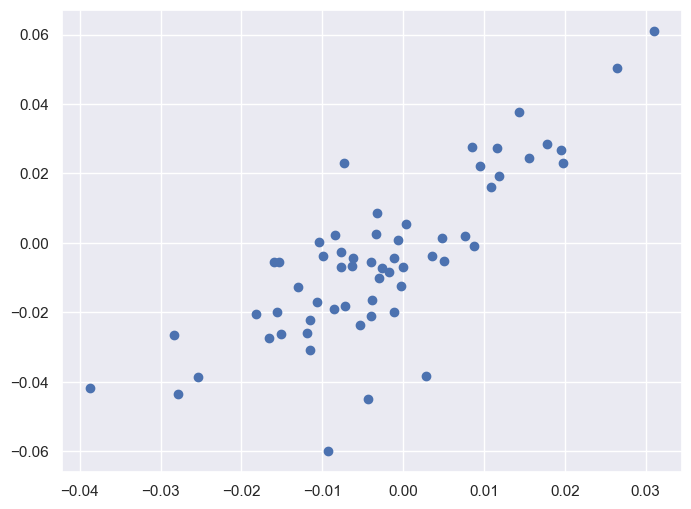

In [10]:
n_sample = returns.sample(60)
plt.scatter(x=n_sample['SPY'], y=n_sample['GOOG'])

<ul>
    <li> Now we would run some statistical tests to make sure this linear relationship is a good one to model. </li>
    <li> We are going to fit the linear model. </li>
</ul>

In [11]:
regr = np.polyfit(n_sample['SPY'], n_sample['GOOG'], deg = 1)
regr

array([ 1.42600519e+00, -9.41605623e-04])

<li> For every 1.2% that S&P goes up we can expect Google to go up 1.6%. </li>
<li> This is equivalent to what we predict beta value  is. </li>

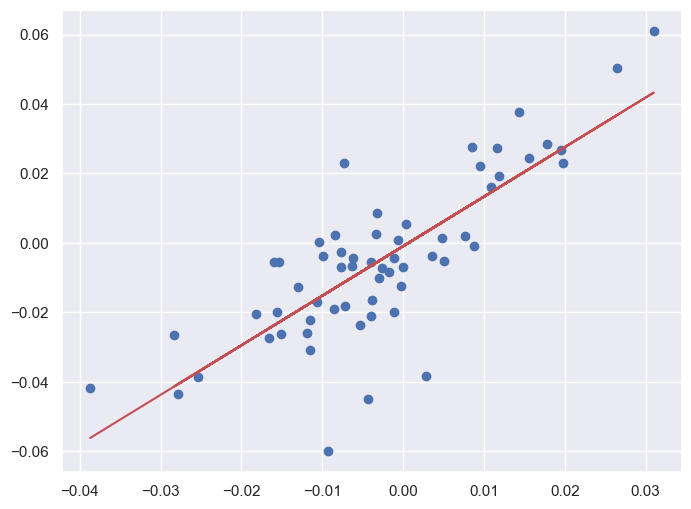

In [12]:
trend = np.polyval(regr, n_sample['SPY'])
plt.scatter(n_sample['SPY'], n_sample['GOOG'])
plt.plot(n_sample["SPY"], trend, 'r')

<h2> Regression as a Technical Indicator </h2>

<li> Using regression as a technical indicator to predict the future price. </li>

In [17]:
data = fin.Ticker('SPY')
data_hist = pd.DataFrame(data.history(start = start)['Close'])
data_hist.head()

,Close
Date,
2022-02-03 00:00:00-05:00,439.470337
2022-02-04 00:00:00-05:00,441.536835
2022-02-07 00:00:00-05:00,440.119843
2022-02-08 00:00:00-05:00,443.741089
2022-02-09 00:00:00-05:00,450.235687


In [19]:
time = np.arange(1, len(data_hist)+1)
data_hist['Time'] = time
data_hist = data_hist[['Time', 'Close']]
data_hist = round(data_hist,2)
data_hist.tail()

,Time,Close
Date,,
2023-01-30 00:00:00-05:00,248,400.59
2023-01-31 00:00:00-05:00,249,406.48
2023-02-01 00:00:00-05:00,250,410.80
2023-02-02 00:00:00-05:00,251,416.78
2023-02-03 00:00:00-05:00,252,412.35


<h3> Fitting the model </h3>
<ul>
    <li> Here our independent variable is time (or the succession of time) and the dependent variable is the S&P500.</li>
</ul>

In [22]:
reg = np.polyfit(data_hist['Time'], data_hist['Close'], deg = 1)
reg

array([-1.93145652e-01,  4.24680901e+02])

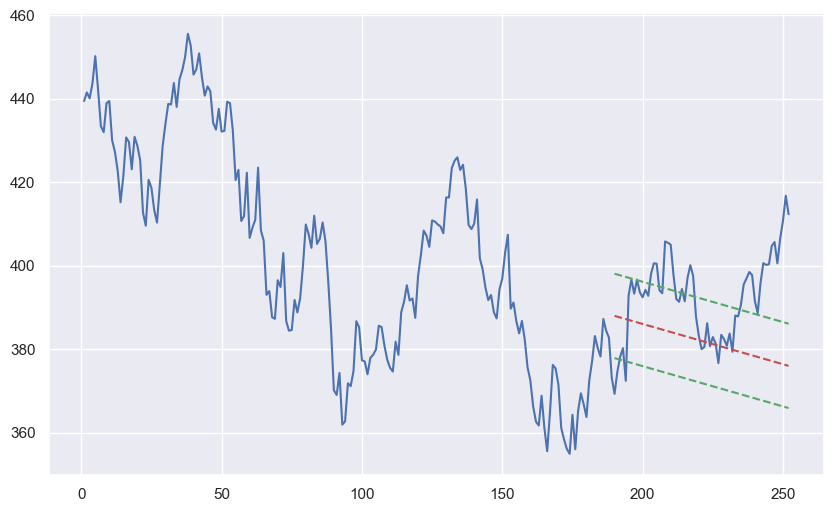

In [26]:
trend_n = np.polyval(reg,data_hist['Time'][-63:])
std = data_hist['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.plot(data_hist['Time'], data_hist['Close'], label = "S&P500")
plt.plot(data_hist['Time'][-63:],trend_n,'r--')
plt.plot(data_hist['Time'][-63:],trend_n-std,'g--')
plt.plot(data_hist['Time'][-63:],trend_n+std,'g--')

<ul>
    <li> We have fit the model and plotted a channel around that model. </li>
    <li> Now, we are going to use the linear model to make predictions about the future model. </li>
    <li> Looking at this strong downward trend and time as the indicator (and as the main predictor) we can extend further into the future and see what our prediction is. </li>
</ul>

In [29]:
predict = np.poly1d(reg)
pre_1 = predict(253)
pre_2 = predict(300)
pre_3 = predict(365)
print(pre_1, pre_2, pre_3)

375.81505122367696 366.73720558383843 354.18273820959365


<h3> Simple Scatter Plot with Trend Line </h3>

<AxesSubplot: xlabel='Time', ylabel='Close'>

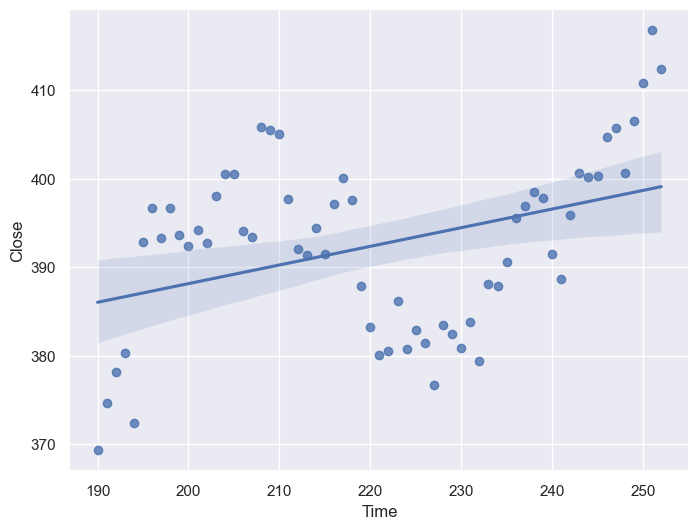

In [30]:
sb.regplot(x="Time", y="Close",fit_reg=True, data=data_hist[-63:])

<ul>
    <li> We see a panel channel around the prediction and its thinner towards the middle, that is the confidence interval of the predication.</li>
</ul>

<AxesSubplot: xlabel='Time', ylabel='Close'>

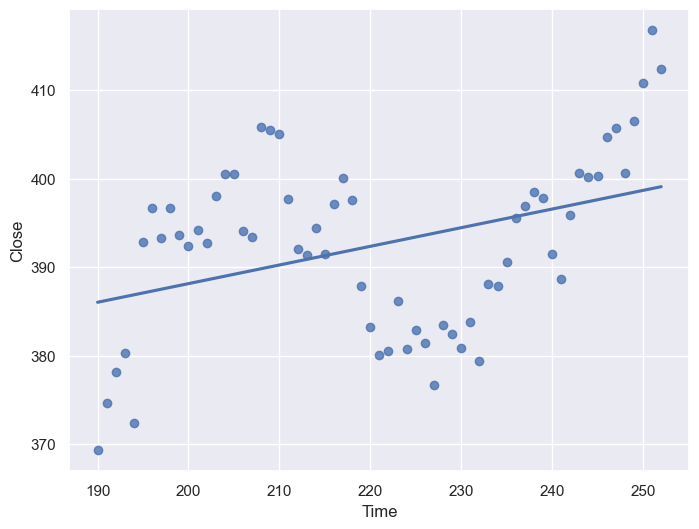

: 

In [31]:
sb.regplot(x="Time", y="Close",ci = None, fit_reg=True, data=data_hist[-63:])

<li> Without the confidence interval. </li>